In [1]:
conda install -c conda-forge librosa

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
conda install -c numba numba


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [1]:
conda install -c menpo ffmpeg

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import librosa
from matplotlib import pyplot as plt
import librosa.display

audio_path = 'C:/Users/xiao.luo/Documents/PycharmProjects/ASR/Audio/welcome.mp3'
x, sr = librosa.load(audio_path, sr=None)
print(type(x), type(sr))

c:\tools\miniconda2\envs\py3.8\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


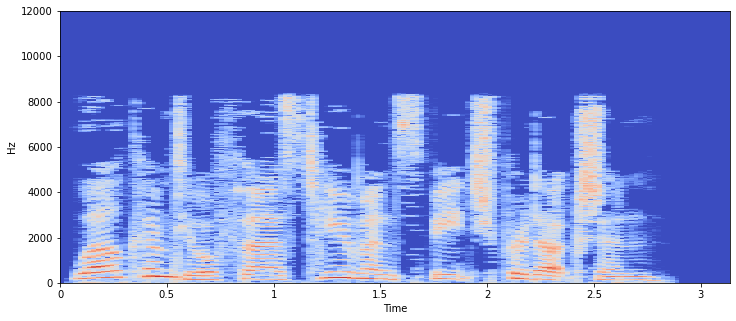

In [5]:
#display the spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(12,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

c:\tools\miniconda2\envs\py3.8\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


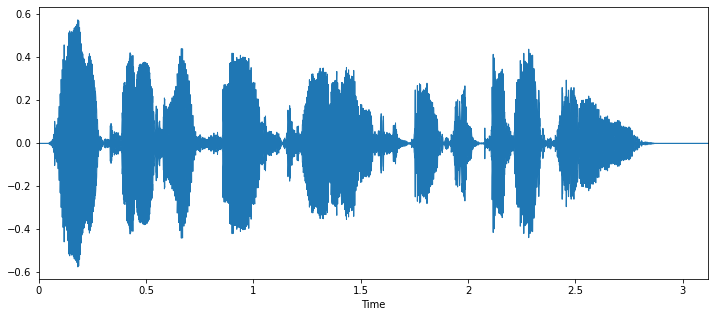

In [7]:
#understand zero crossing rate
x, sr = librosa.load(audio_path)
plt.figure(figsize=(12,5))
librosa.display.waveplot(x, sr=sr)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

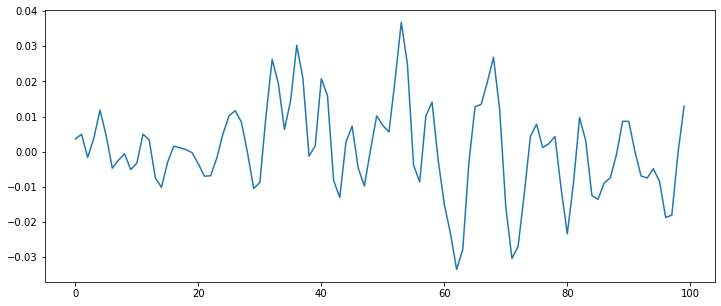

In [8]:
#understand zooming in
n0 = 8000
n1 = 8100
plt.figure(figsize=(12,5))
plt.plot(x[n0:n1])
plt.grid

In [10]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False False  True  True False False  True False False False False  True
 False  True False False  True False False  True False False False False
  True False False False  True False False  True False False False False
 False False  True  True False False  True False  True False  True False
  True False False False False False False  True False  True False  True
 False False False False False  True False False False False  True False
 False False  True False False False False  True False False  True False
  True False False False False  True False False  True False False False
 False False False  True]
28


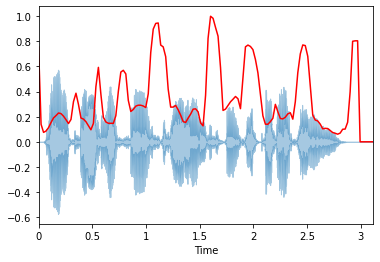

In [11]:
#understand the spectral centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

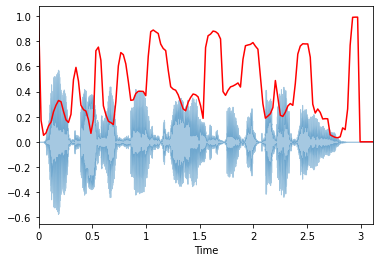

In [12]:
#understand spectral roll-off
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 135)


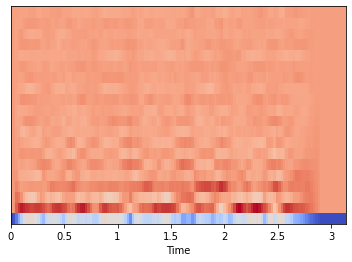

In [13]:
#understand MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)  #(num_of_mfcc, num_of_frames)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')